# <h1><center> Parsers Benchmarking <br> <br> by Team Sava Krasava</center></h1> 

This notebook uses the functions implemented to compare according to F1-score (ParseEval metric) to evaluate how the parsers perform for different tensor decomposition methods and ranks chosen. 

In [12]:
# Required libraries
import numpy as np
import nltk 
from nltk.corpus import treebank
from nltk import Tree

import sys, time
import copy

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
#Import functions for measure F1-score
def precision(golds, parses ):
    """Return the proportion of brackets in the suggested parse tree that are
    in the gold standard. """

    total = 0
    successes = 0

    for (gold, parse) in zip(golds, parses):
        if parse is not None:
            parsebrackets = list_brackets(parse)
            goldbrackets = list_brackets(gold)
            
            candidate = parsebrackets
            gold = goldbrackets

            total += len(candidate)
            for bracket in candidate:
                if bracket in gold:
                    successes += 1
    if total == 0 :
        return 0.0 
    return float(successes) / float(total)


def recall(golds, parses):
    """Return the proportion of brackets in the gold standard that are in the
    suggested parse tree."""

    total = 0
    successes = 0

    for (gold, parse) in zip(golds, parses):
        
        goldbrackets = list_brackets(gold)
        gold = goldbrackets

        total += len(gold)

        if parse is not None:
            parsebrackets = list_brackets(parse)
            candidate = parsebrackets

            for bracket in gold:
                if bracket in candidate:
                    successes += 1
    if total==0:
        return 0 
    return float(successes) / float(total)

def f1_score( p , r ):
    """Return the F1 score of the parse with respect to the gold standard"""
    if ( p == 0 and r == 0 ):
        return 0 
    f1 = (2.0*p*r)/(p+r)
    return f1
    
def words_to_indexes(tree):
    """Return a new tree based on the original tree, such that the leaf values
    are replaced by their indeces."""

    out = copy.deepcopy(tree)
    leaves = out.leaves()
    for index in range(0, len(leaves)):
        path = out.leaf_treeposition(index)
        out[path] = index + 1
    return out

def list_brackets(tree):
    tree = words_to_indexes(tree)

    def not_pos_tag(tr):
        return tr.height() > 2

    subtrees = tree.subtrees(filter=not_pos_tag)
    return [(sub.leaves()[0], sub.leaves()[-1]) for sub in subtrees]

We used the data obtained from the French grammar in the dataset [Multilingual L-PCFG Models]( http://cohort.inf.ed.ac.uk/lpcfg.html ).

In [45]:
# Read the data from rank 10 tensor approximation
with open('french/results/test_exact_0.txt') as f:
    test = f.readlines()
test_exact = [x.strip() for x in test][:99]

# Read the data from rank 50 tensor approximation
test_tt = {}
for rank in [10, 50, 100, 150]:
    with open('french/results/test_tt_{}.txt'.format(rank)) as f:
        test = f.readlines()
    test_tt[rank] = [x.strip() for x in test][:99]
    
test_tucker = {}
for rank in [10, 50, 100, 150]:
    with open('french/results/test_tucker_{}.txt'.format(rank)) as f:
        test = f.readlines()
    test_tucker[rank] = [x.strip() for x in test][:99]

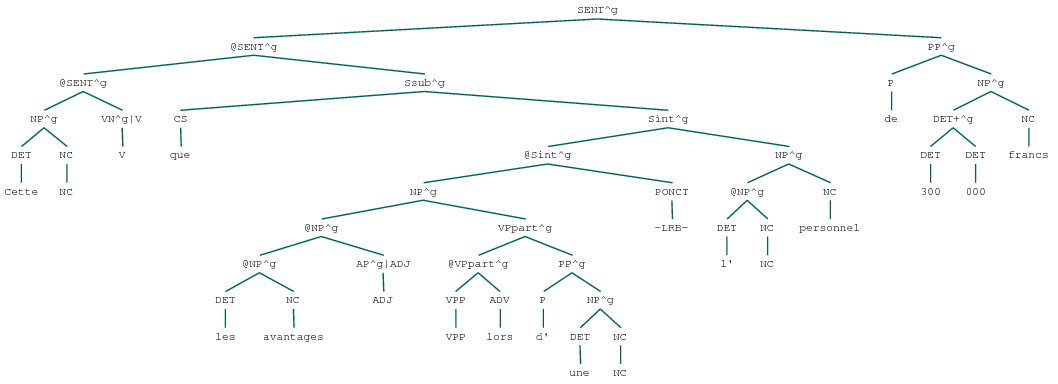

In [48]:
#Visualization of a Parse Tree Obtained 
Tree.fromstring(test_exact[42])

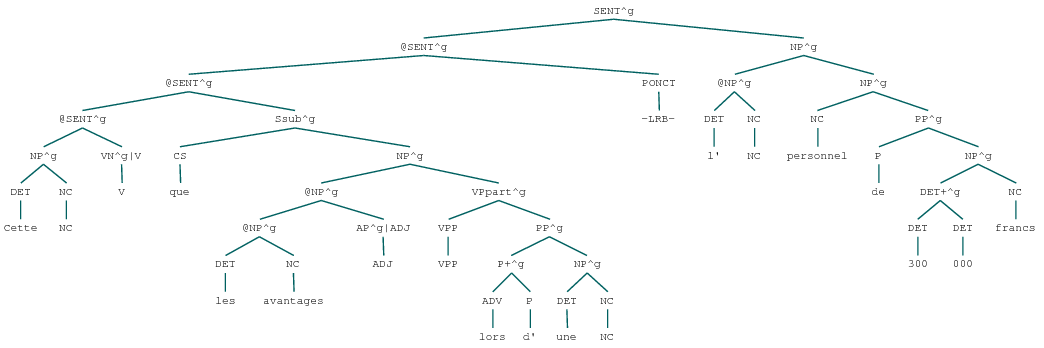

In [50]:
#Visualization of a Parse Tree Obtained 
Tree.fromstring(test_tt[50][42])

In [22]:
#Benchmark 
gold = [ Tree.fromstring(test_exact[i]) for i in range(len(test_exact)) ]
parse = [ Tree.fromstring(test_tt[10][i]) for i in range(len(test_tt[10])) ]

# Calculate the scores
pscore = np.asarray([ precision([gold[i]], [parse[i]]) for i in range(len(gold)) ])
rscore = np.asarray([ recall([gold[i]], [parse[i]]) for i in range(len(gold)) ])
f1score =  np.asarray( [ f1_score( pscore[i] , rscore[i]) for i in range(len(gold)) ] ) 
f1score = f1score[ f1score != 0 ]

# Print Results
print('F1-Score: %.6f +/- %.4f' %(f1score.mean(), np.sqrt(f1score.var())) )

F1-Score: 0.471695 +/- 0.1789


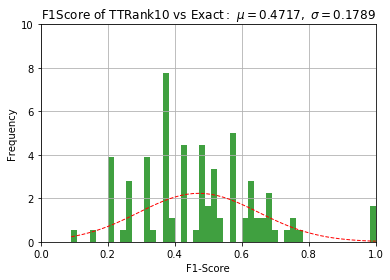

In [23]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# the histogram of the data
n, bins, patches = plt.hist(f1score, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, f1score.mean(), np.sqrt(f1score.var()))
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.title(r'$\mathrm{F1 Score\ of\ TT Rank10\ vs\ Exact:}\ \mu=%.4f,\ \sigma=%.4f$' %(f1score.mean(), np.sqrt(f1score.var())))
plt.axis([0, 1, 0, 10])
plt.grid(True)

plt.show()

In [27]:
#Benchmark 
gold = [ Tree.fromstring(test_exact[i]) for i in range(len(test_exact)) ]
parse = [ Tree.fromstring(test_tt[50][i]) for i in range(len(test_tt[50])) ]

# Calculate the scores
pscore = np.asarray([ precision([gold[i]], [parse[i]]) for i in range(len(gold)) ])
rscore = np.asarray([ recall([gold[i]], [parse[i]]) for i in range(len(gold)) ])
f1score =  np.asarray( [ f1_score( pscore[i] , rscore[i]) for i in range(len(gold)) ] ) 
f1score = f1score[ f1score != 0 ]

# Print Results
print('F1-Score: %.6f +/- %.4f' %(f1score.mean(), np.sqrt(f1score.var())) )

F1-Score: 0.677629 +/- 0.2004


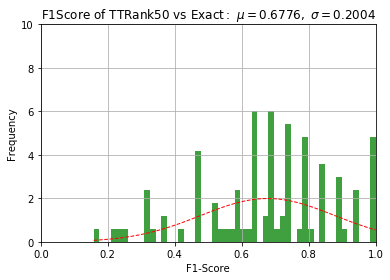

In [28]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# the histogram of the data
n, bins, patches = plt.hist(f1score, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, f1score.mean(), np.sqrt(f1score.var()))
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.title(r'$\mathrm{F1 Score\ of\ TT Rank50\ vs\ Exact:}\ \mu=%.4f,\ \sigma=%.4f$' %(f1score.mean(), np.sqrt(f1score.var())))
plt.axis([0, 1, 0, 10])
plt.grid(True)

plt.show()

In [29]:
#Benchmark 
gold = [ Tree.fromstring(test_exact[i]) for i in range(len(test_exact)) ]
parse = [ Tree.fromstring(test_tt[100][i]) for i in range(len(test_tt[100])) ]

# Calculate the scores
pscore = np.asarray([ precision([gold[i]], [parse[i]]) for i in range(len(gold)) ])
rscore = np.asarray([ recall([gold[i]], [parse[i]]) for i in range(len(gold)) ])
f1score =  np.asarray( [ f1_score( pscore[i] , rscore[i]) for i in range(len(gold)) ] ) 
f1score = f1score[ f1score != 0 ]

# Print Results
print('F1-Score: %.6f +/- %.4f' %(f1score.mean(), np.sqrt(f1score.var())) )

F1-Score: 0.810311 +/- 0.2254


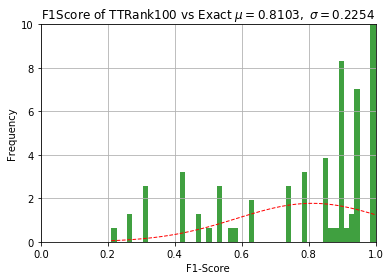

In [30]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# the histogram of the data
n, bins, patches = plt.hist(f1score, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, f1score.mean(), np.sqrt(f1score.var()))
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.title(r'$\mathrm{F1 Score\ of\ TT Rank100\ vs\ Exact}\ \mu=%.4f,\ \sigma=%.4f$' %(f1score.mean(), np.sqrt(f1score.var())))
plt.axis([0, 1, 0, 10])
plt.grid(True)

plt.show()

In [31]:
#Benchmark 
gold = [ Tree.fromstring(test_exact[i]) for i in range(len(test_exact)) ]
parse = [ Tree.fromstring(test_tt[150][i]) for i in range(len(test_tt[150])) ]

# Calculate the scores
pscore = np.asarray([ precision([gold[i]], [parse[i]]) for i in range(len(gold)) ])
rscore = np.asarray([ recall([gold[i]], [parse[i]]) for i in range(len(gold)) ])
f1score =  np.asarray( [ f1_score( pscore[i] , rscore[i]) for i in range(len(gold)) ] ) 
f1score = f1score[ f1score != 0 ]

# Print Results
print('F1-Score: %.6f +/- %.4f' %(f1score.mean(), np.sqrt(f1score.var())) )

F1-Score: 1.000000 +/- 0.0000


In [38]:
#Benchmark 
gold = [ Tree.fromstring(test_exact[i]) for i in range(len(test_exact)) ]
parse = [ Tree.fromstring(test_tucker[10][i]) for i in range(len(test_tucker[10])) ]

# Calculate the scores
pscore = np.asarray([ precision([gold[i]], [parse[i]]) for i in range(len(gold)) ])
rscore = np.asarray([ recall([gold[i]], [parse[i]]) for i in range(len(gold)) ])
f1score =  np.asarray( [ f1_score( pscore[i] , rscore[i]) for i in range(len(gold)) ] ) 
f1score = f1score[ f1score != 0 ]

# Print Results
print('F1-Score: %.6f +/- %.4f' %(f1score.mean(), np.sqrt(f1score.var())) )

F1-Score: 0.447789 +/- 0.1779


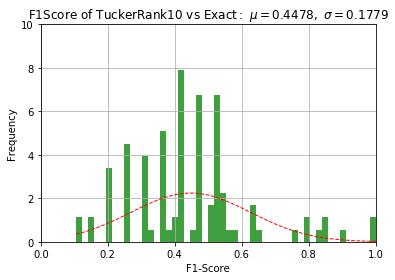

In [39]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# the histogram of the data
n, bins, patches = plt.hist(f1score, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, f1score.mean(), np.sqrt(f1score.var()))
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.title(r'$\mathrm{F1 Score\ of\ Tucker Rank10\ vs\ Exact:}\ \mu=%.4f,\ \sigma=%.4f$' %(f1score.mean(), np.sqrt(f1score.var())))
plt.axis([0, 1, 0, 10])
plt.grid(True)

plt.show()

In [40]:
#Benchmark 
gold = [ Tree.fromstring(test_exact[i]) for i in range(len(test_exact)) ]
parse = [ Tree.fromstring(test_tucker[50][i]) for i in range(len(test_tucker[50])) ]

# Calculate the scores
pscore = np.asarray([ precision([gold[i]], [parse[i]]) for i in range(len(gold)) ])
rscore = np.asarray([ recall([gold[i]], [parse[i]]) for i in range(len(gold)) ])
f1score =  np.asarray( [ f1_score( pscore[i] , rscore[i]) for i in range(len(gold)) ] ) 
f1score = f1score[ f1score != 0 ]

# Print Results
print('F1-Score: %.6f +/- %.4f' %(f1score.mean(), np.sqrt(f1score.var())) )

F1-Score: 0.666089 +/- 0.1893


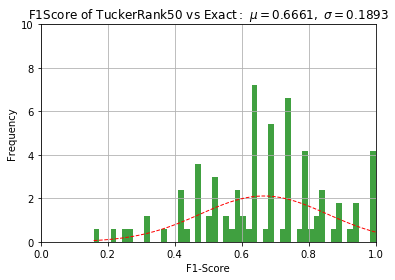

In [41]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# the histogram of the data
n, bins, patches = plt.hist(f1score, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, f1score.mean(), np.sqrt(f1score.var()))
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.title(r'$\mathrm{F1 Score\ of\ Tucker Rank50\ vs\ Exact:}\ \mu=%.4f,\ \sigma=%.4f$' %(f1score.mean(), np.sqrt(f1score.var())))
plt.axis([0, 1, 0, 10])
plt.grid(True)

plt.show()

In [42]:
#Benchmark 
gold = [ Tree.fromstring(test_exact[i]) for i in range(len(test_exact)) ]
parse = [ Tree.fromstring(test_tucker[100][i]) for i in range(len(test_tucker[100])) ]

# Calculate the scores
pscore = np.asarray([ precision([gold[i]], [parse[i]]) for i in range(len(gold)) ])
rscore = np.asarray([ recall([gold[i]], [parse[i]]) for i in range(len(gold)) ])
f1score =  np.asarray( [ f1_score( pscore[i] , rscore[i]) for i in range(len(gold)) ] ) 
f1score = f1score[ f1score != 0 ]

# Print Results
print('F1-Score: %.6f +/- %.4f' %(f1score.mean(), np.sqrt(f1score.var())) )

F1-Score: 0.809457 +/- 0.2262


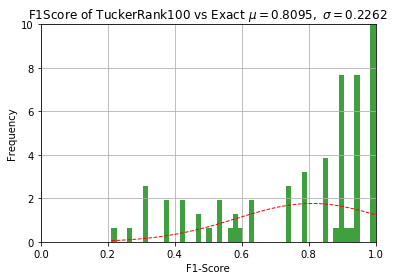

In [43]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# the histogram of the data
n, bins, patches = plt.hist(f1score, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, f1score.mean(), np.sqrt(f1score.var()))
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('F1-Score')
plt.ylabel('Frequency')
plt.title(r'$\mathrm{F1 Score\ of\ Tucker Rank100\ vs\ Exact}\ \mu=%.4f,\ \sigma=%.4f$' %(f1score.mean(), np.sqrt(f1score.var())))
plt.axis([0, 1, 0, 10])
plt.grid(True)

plt.show()

In [46]:
#Benchmark 
gold = [ Tree.fromstring(test_exact[i]) for i in range(len(test_exact)) ]
parse = [ Tree.fromstring(test_tucker[150][i]) for i in range(len(test_tucker[150])) ]

# Calculate the scores
pscore = np.asarray([ precision([gold[i]], [parse[i]]) for i in range(len(gold)) ])
rscore = np.asarray([ recall([gold[i]], [parse[i]]) for i in range(len(gold)) ])
f1score =  np.asarray( [ f1_score( pscore[i] , rscore[i]) for i in range(len(gold)) ] ) 
f1score = f1score[ f1score != 0 ]

# Print Results
print('F1-Score: %.6f +/- %.4f' %(f1score.mean(), np.sqrt(f1score.var())) )

F1-Score: 1.000000 +/- 0.0000


In [127]:
#Perfect match cases
np.where(f1score == 1)

(array([ 60,  69,  90, 109, 123, 151, 163, 164, 170, 189, 223, 251, 265,
        281, 300, 319, 349, 386, 390, 405, 456, 489, 496]),)

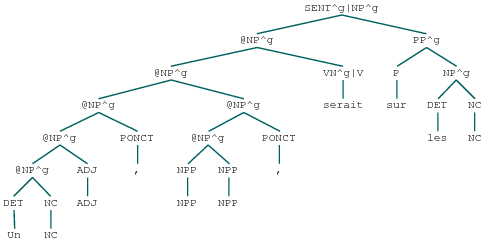

In [115]:
#Example that is close but not exactly 
Tree.fromstring(test_10[242])

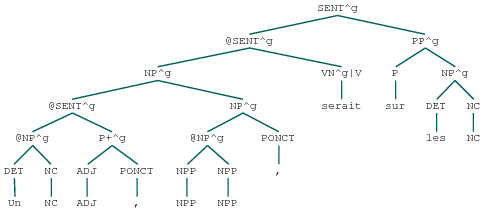

In [116]:
Tree.fromstring(test_50[242])